In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

# Weather data

In [351]:
data_frame = pd.read_csv("MATF_Hackathon_2021/BA_2012-2021.csv", sep=";")

clean_data = pd.DataFrame()

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (6,12,13,16,17,18,19,20,21,23,25,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [352]:
data_frame["T"].head()

0    11.9
1    12.9
2    14.3
3    15.3
4    17.5
Name: T, dtype: float64

In [353]:
data_frame.iloc[0]

DateTime                         31.03.2021 23:00
T                                            11.9
Po                                         1010.5
P                                          1022.5
Pa                                           -0.5
U                                              67
DD          Wind blowing from the north-northwest
Ff                                              1
ff10                                          NaN
ff3                                           NaN
N                                       no clouds
WW                                               
W1                                            NaN
W2                                            NaN
Tn                                            NaN
Tx                                            NaN
Cl                                            NaN
Nh                                            NaN
H                                             NaN
Cm                                            NaN


### Parse DateTime

In [354]:
def datetime2ymd(in_df, out_df):
    out_df["year"]  = in_df["DateTime"].astype(str).str[:4].astype(int)
    out_df["month"] = in_df["DateTime"].astype(str).str[5:7].astype(int)
    out_df["day"]   = in_df["DateTime"].astype(str).str[8:10].astype(int)
    out_df["hour"]  = in_df["DateTime"].astype(str).str[11:13].astype(int)
    out_df["min"]   = in_df["DateTime"].astype(str).str[14:].astype(int)
    
    return out_df

def datetime2dmy(in_df, out_df):
    out_df["year"]  = in_df["DateTime"].astype(str).str[6:10].astype(int)
    out_df["month"] = in_df["DateTime"].astype(str).str[3:5].astype(int)
    out_df["day"]   = in_df["DateTime"].astype(str).str[:2].astype(int)
    out_df["hour"]  = in_df["DateTime"].astype(str).str[11:13].astype(int)
    out_df["min"]   = in_df["DateTime"].astype(str).str[14:].astype(int)
    
    return out_df

In [355]:
clean_data = datetime2dmy(data_frame, clean_data)

In [356]:
copy_columns = ["T", "Po", "U", "Ff", "Tn"]
clean_data[copy_columns] = data_frame[copy_columns]


In [357]:
clean_data

,year,month,day,hour,min,T,Po,U,Ff,Tn
0,2021,3,31,23,0,11.9,1010.5,67,1.0,NaN
1,2021,3,31,22,0,12.9,1010.9,62,1.0,NaN
2,2021,3,31,21,0,14.3,1011.0,57,1.0,NaN
3,2021,3,31,20,0,15.3,1011.0,53,1.0,NaN
4,2021,3,31,19,0,17.5,1011.1,45,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...
78461,2012,9,26,12,0,29.0,1002.3,Wind blowing from the south,NaN,NaN
78462,2012,9,26,11,0,28.0,1002.3,Wind blowing from the south-west,NaN,NaN
78463,2012,9,26,10,0,26.0,1002.2,Wind blowing from the south-southwest,NaN,NaN
78464,2012,9,26,9,0,24.0,1002.1,Wind blowing from the south-southwest,NaN,NaN


# Target data

In [358]:
target_df = pd.read_csv("MATF_Hackathon_2021/SviPodaci_mStanica_BeogradNBG.csv")
clean_target = pd.DataFrame()

target_df = target_df.rename(columns={"Datum_i_Vreme": "DateTime"})

target_df.head()

,DateTime,MernaStanica,B,CO,NO2,O3,PM10,PM25,SO2
0,2012-06-11 16:00,Beograd Novi Beograd,0.269729,0.590997,63.094881,53.622829,23.109444,9.742659,2.789345
1,2015-03-09 08:00,Beograd Novi Beograd,2.042423,1.113447,19.640968,56.213282,26.856319,19.293327,84.947258
2,2010-05-19 09:00,Beograd Novi Beograd,0.778962,0.905177,26.346479,NaN,22.899085,12.057213,2.703677
3,2010-07-17 00:00,Beograd Novi Beograd,0.686226,0.994739,31.578526,44.185095,29.241251,22.910294,8.567367
4,2018-05-01 00:00,Beograd Novi Beograd,NaN,0.250000,NaN,43.600000,NaN,NaN,12.900000


In [359]:
clean_target = datetime2ymd(target_df, clean_target)
copy_columns = ["B", "CO", "NO2", "O3", "PM10", "PM25", "SO2"]

clean_target[copy_columns] = target_df[copy_columns]
clean_target = clean_target.sort_values(by=["year", "month", "day", "hour", "min"])

clean_target.head()

,year,month,day,hour,min,B,CO,NO2,O3,PM10,PM25,SO2
23026,2009,11,17,20,0,NaN,NaN,NaN,NaN,NaN,54.221211,NaN
28045,2009,11,17,21,0,NaN,NaN,NaN,NaN,NaN,61.848214,NaN
52868,2009,11,17,22,0,NaN,NaN,NaN,NaN,NaN,47.386997,NaN
68772,2009,11,17,23,0,NaN,NaN,NaN,NaN,NaN,42.317648,NaN
41525,2009,11,18,0,0,NaN,NaN,NaN,NaN,NaN,41.457331,NaN


## Data ploting

#### By Hour

Text(0.5, 0, 'Hour')

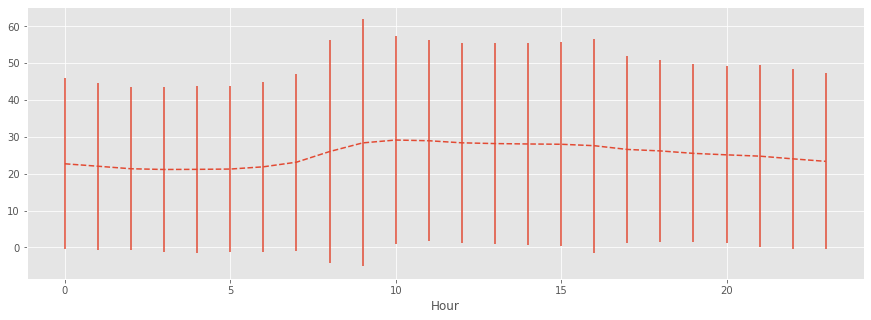

In [360]:
month = clean_target.loc[
    (clean_target["year"].isin([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])) &
    (clean_target["month"].isin([10, 11, 12, 1, 2]))
]

polution_by_hour = []
std_by_hour = []
for hour in range(24):
    polution_by_hour.append(month.loc[month["hour"] == hour].mean()["SO2"])
    std_by_hour.append(month.loc[month["hour"] == hour].std()["SO2"])
    
plt.errorbar(list(range(24)), polution_by_hour, std_by_hour, linestyle="--")
plt.xlabel("Hour")

#### By Month

Text(0.5, 0, 'Month')

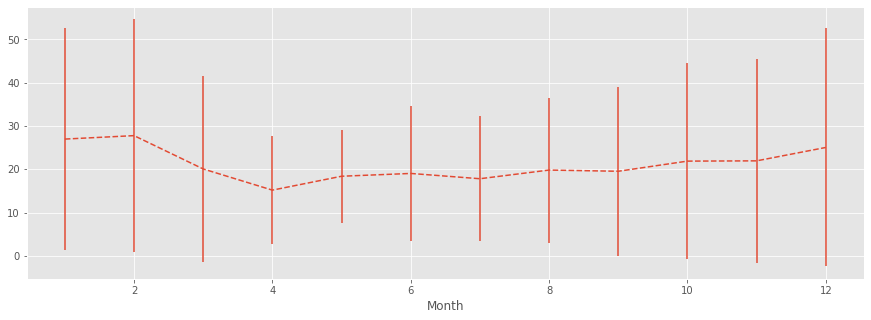

In [361]:
years = clean_target.loc[
    (clean_target["year"].isin([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]))
]

polution_by_month = []
std_by_month = []
for mth in range(1, 13):
    polution_by_month.append(years.loc[years["month"] == mth].mean()["SO2"])
    std_by_month.append(years.loc[years["month"] == mth].std()["SO2"])
    
plt.errorbar(list(range(1, 13)), polution_by_month, std_by_month, linestyle="--")
plt.xlabel("Month")

### Corelation

In [362]:
polution_values = clean_target.loc[
    (clean_target["year"].isin([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]))
]

weather_values = clean_data.loc[
    (clean_data["year"].isin([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]))
]

In [363]:
polution_values

,year,month,day,hour,min,B,CO,NO2,O3,PM10,PM25,SO2
70116,2013,1,1,0,0,NaN,1.557448,48.949783,8.891557,131.276529,111.737020,64.786165
54152,2013,1,1,1,0,NaN,1.258721,41.045255,6.361556,117.620484,102.701927,61.000120
15211,2013,1,1,2,0,NaN,1.379518,40.201718,5.797415,116.955970,102.937224,59.519233
32118,2013,1,1,3,0,NaN,1.215408,42.726482,4.220533,93.698677,82.253693,56.492880
37561,2013,1,1,4,0,NaN,1.037442,45.026212,3.103611,75.442917,65.719483,56.505827
...,...,...,...,...,...,...,...,...,...,...,...,...
7460,2020,12,31,19,0,1.78,0.370000,15.000000,37.800000,15.400000,13.400000,8.170000
52167,2020,12,31,20,0,1.72,0.370000,12.700000,36.400000,16.800000,15.700000,8.720000
43702,2020,12,31,21,0,1.65,0.390000,13.700000,33.800000,20.400000,19.000000,7.770000
60296,2020,12,31,22,0,1.69,0.360000,12.000000,34.800000,23.200000,22.300000,8.080000


In [367]:
polution_values.tail(10)

,year,month,day,hour,min,B,CO,NO2,O3,PM10,PM25,SO2
16096,2020,12,31,14,0,2.76,0.58,27.90,30.0,39.1,39.0,20.00
92165,2020,12,31,15,0,3.27,0.50,20.30,28.5,25.0,24.5,21.50
40296,2020,12,31,16,0,2.25,0.42,22.30,25.7,15.4,13.5,10.40
78138,2020,12,31,17,0,2.22,0.45,19.70,27.0,19.7,17.8,8.98
50663,2020,12,31,18,0,2.30,0.44,18.40,31.2,19.7,18.2,8.44
7460,2020,12,31,19,0,1.78,0.37,15.00,37.8,15.4,13.4,8.17
52167,2020,12,31,20,0,1.72,0.37,12.70,36.4,16.8,15.7,8.72
43702,2020,12,31,21,0,1.65,0.39,13.70,33.8,20.4,19.0,7.77
60296,2020,12,31,22,0,1.69,0.36,12.00,34.8,23.2,22.3,8.08
22587,2020,12,31,23,0,1.57,0.33,7.15,36.2,24.0,22.9,7.08


In [374]:
weather_values = weather_values.merge(polution_values).head(20)

In [377]:
weather_values.corr()["SO2"]["T"]

0.6260266658240025